In [1]:
import boto3
import pandas as pd
from io import BytesIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def acessar_csv_s3(bucket_name, object_key):
    s3 = boto3.client('s3')
    response = s3.get_object(Bucket=bucket_name, Key=object_key)

    csv_content = response['Body'].read()
    df = pd.read_csv(BytesIO(csv_content), decimal='.')

    return df

In [3]:
# Configurações do S3
bucket_name = 'black-umbrella-fiap'
object_key = 'bronze/meteostat/dados_historicos_2020_2024.csv'

df = acessar_csv_s3(bucket_name, object_key)  # Baixar o CSV existente no S3

In [ ]:
bucket_name = 'black-umbrella-fiap'
object_key = 'bronze/ocorrencias/ocorrencias_2013_2024.csv'

df_ocorrencias = acessar_csv_s3(bucket_name, object_key)  # Baixar o CSV existente no S3

In [4]:
df

,index,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,Distrito
0,2020-01-01 00:00:00,23.9,19.6,77.0,NaN,NaN,130.0,3.6,NaN,1013.0,NaN,2.0,Água Rasa
1,2020-01-01 01:00:00,24.0,19.1,74.0,NaN,NaN,80.0,7.6,NaN,1014.0,NaN,2.0,Água Rasa
2,2020-01-01 02:00:00,24.0,19.1,74.0,NaN,NaN,60.0,9.4,NaN,1014.0,NaN,1.0,Água Rasa
3,2020-01-01 03:00:00,24.0,18.0,69.0,NaN,NaN,40.0,5.4,NaN,1013.0,NaN,2.0,Água Rasa
4,2020-01-01 04:00:00,24.0,18.0,69.0,NaN,NaN,50.0,5.4,NaN,1013.0,NaN,1.0,Água Rasa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862360,2024-09-08 20:00:00,29.7,10.3,30.0,0.0,NaN,85.0,17.6,NaN,1018.0,NaN,2.0,Lajeado
3862361,2024-09-08 21:00:00,26.9,11.8,39.0,0.0,NaN,115.0,14.0,NaN,1018.3,NaN,1.0,Lajeado
3862362,2024-09-08 22:00:00,25.1,13.0,47.0,0.0,NaN,114.0,12.2,NaN,1018.8,NaN,1.0,Lajeado
3862363,2024-09-08 23:00:00,23.6,12.0,48.0,0.0,NaN,97.0,10.8,NaN,1019.5,NaN,1.0,Lajeado


In [5]:
df2 = df.copy()

### Verificação inicial da base

In [6]:
# Mostrando as primeiras linhas do dataframe
df2.head()

,index,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,Distrito
0,2020-01-01 00:00:00,23.9,19.6,77.0,NaN,NaN,130.0,3.6,NaN,1013.0,NaN,2.0,Água Rasa
1,2020-01-01 01:00:00,24.0,19.1,74.0,NaN,NaN,80.0,7.6,NaN,1014.0,NaN,2.0,Água Rasa
2,2020-01-01 02:00:00,24.0,19.1,74.0,NaN,NaN,60.0,9.4,NaN,1014.0,NaN,1.0,Água Rasa
3,2020-01-01 03:00:00,24.0,18.0,69.0,NaN,NaN,40.0,5.4,NaN,1013.0,NaN,2.0,Água Rasa
4,2020-01-01 04:00:00,24.0,18.0,69.0,NaN,NaN,50.0,5.4,NaN,1013.0,NaN,1.0,Água Rasa


In [7]:
# Verificando informações gerais e tipos de dados
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862365 entries, 0 to 3862364
Data columns (total 13 columns):
 #   Column    Dtype  
---  ------    -----  
 0   index     object 
 1   temp      float64
 2   dwpt      float64
 3   rhum      float64
 4   prcp      float64
 5   snow      float64
 6   wdir      float64
 7   wspd      float64
 8   wpgt      float64
 9   pres      float64
 10  tsun      float64
 11  coco      float64
 12  Distrito  object 
dtypes: float64(11), object(2)
memory usage: 383.1+ MB


In [8]:
# Estatísticas descritivas básicas
df2.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,3.858827e+06,3.858827e+06,3.858827e+06,2.993023e+06,0.0,3.858472e+06,3.858792e+06,0.0,3.849043e+06,0.0,3.482403e+06
mean,1.980978e+01,1.478803e+01,7.563900e+01,1.450606e-01,NaN,1.603348e+02,1.134698e+01,NaN,1.017724e+03,NaN,3.963306e+00
std,4.647746e+00,3.698885e+00,1.807618e+01,7.197986e-01,NaN,9.728806e+01,6.007281e+00,NaN,4.381650e+00,NaN,3.940905e+00
min,1.000000e+00,-1.560000e+01,9.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,9.220000e+02,NaN,0.000000e+00
25%,1.660000e+01,1.230000e+01,6.400000e+01,0.000000e+00,NaN,9.000000e+01,7.600000e+00,NaN,1.014800e+03,NaN,2.000000e+00
50%,1.960000e+01,1.510000e+01,8.000000e+01,0.000000e+00,NaN,1.400000e+02,1.110000e+01,NaN,1.017800e+03,NaN,3.000000e+00
75%,2.290000e+01,1.790000e+01,8.900000e+01,0.000000e+00,NaN,2.050000e+02,1.480000e+01,NaN,1.021000e+03,NaN,4.000000e+00
max,3.900000e+01,2.700000e+01,1.000000e+02,1.990000e+01,NaN,3.600000e+02,6.300000e+01,NaN,1.033000e+03,NaN,2.600000e+01


In [9]:
# Verificando valores ausentes por coluna
missing_data = df2.isnull().sum()
print(missing_data)

index             0
temp           3538
dwpt           3538
rhum           3538
prcp         869342
snow        3862365
wdir           3893
wspd           3573
wpgt        3862365
pres          13322
tsun        3862365
coco         379962
Distrito          0
dtype: int64


In [10]:
# Verificar a porcentagem de valores ausentes
missing_percentage = (missing_data / len(df2)) * 100
print(missing_percentage)

index         0.000000
temp          0.091602
dwpt          0.091602
rhum          0.091602
prcp         22.508023
snow        100.000000
wdir          0.100793
wspd          0.092508
wpgt        100.000000
pres          0.344918
tsun        100.000000
coco          9.837548
Distrito      0.000000
dtype: float64


### Análise Exploratória Inicial

In [11]:
# Distribuição temporal de dados
df2['index'] = pd.to_datetime(df2['index'])
df2.set_index('index', inplace=True)

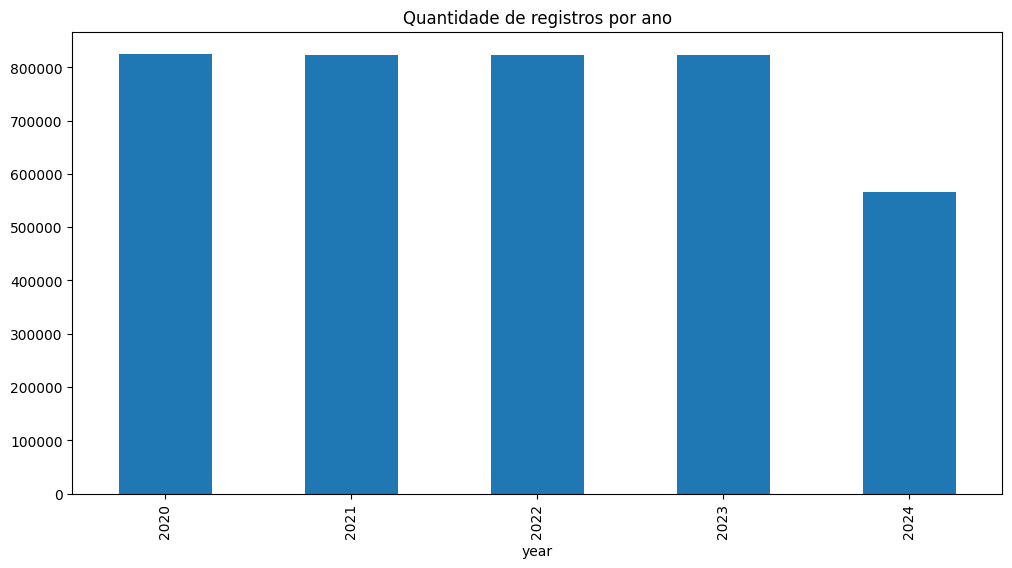

In [12]:
# Contagem de registros por ano
df2['year'] = df2.index.year
dados_anuais = df2.groupby('year').size()
plt.figure(figsize=(12,6))
dados_anuais.plot(kind='bar')
plt.title('Quantidade de registros por ano')
plt.show()

In [13]:
df['Distrito'].value_counts()

Distrito
Água Rasa             41089
Perus                 41089
Santana               41089
Santa Cecília         41089
Sacomã                41089
                      ...  
Freguesia do Ó        41089
Ermelino Matarazzo    41089
Cursino               41089
Lajeado               41089
Tremembé              41088
Name: count, Length: 94, dtype: int64

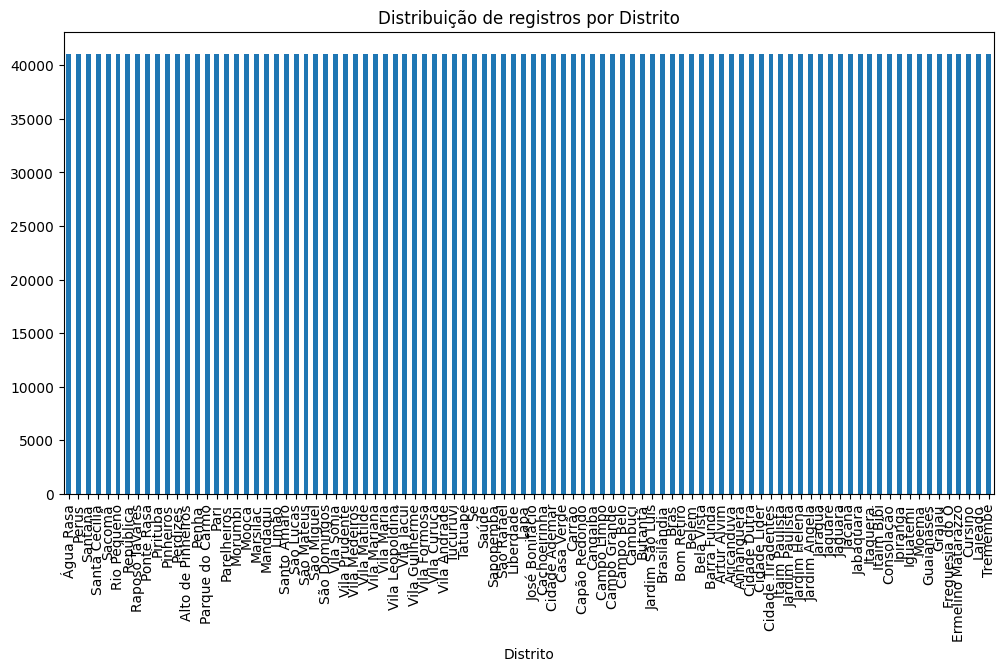

In [14]:
# Analisando dados por distrito
dados_distritos = df['Distrito'].value_counts()
plt.figure(figsize=(12,6))
dados_distritos.plot(kind='bar')
plt.title('Distribuição de registros por Distrito')
plt.show()

- Tendências Temporais

In [15]:
# Plotando a distribuição temporal dos dados
df2['year'] = df2.index.year
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['hour'] = df2.index.hour

C:\Users\prado\AppData\Local\Temp\ipykernel_27308\2525396713.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2['temp'].resample('M').mean().plot()


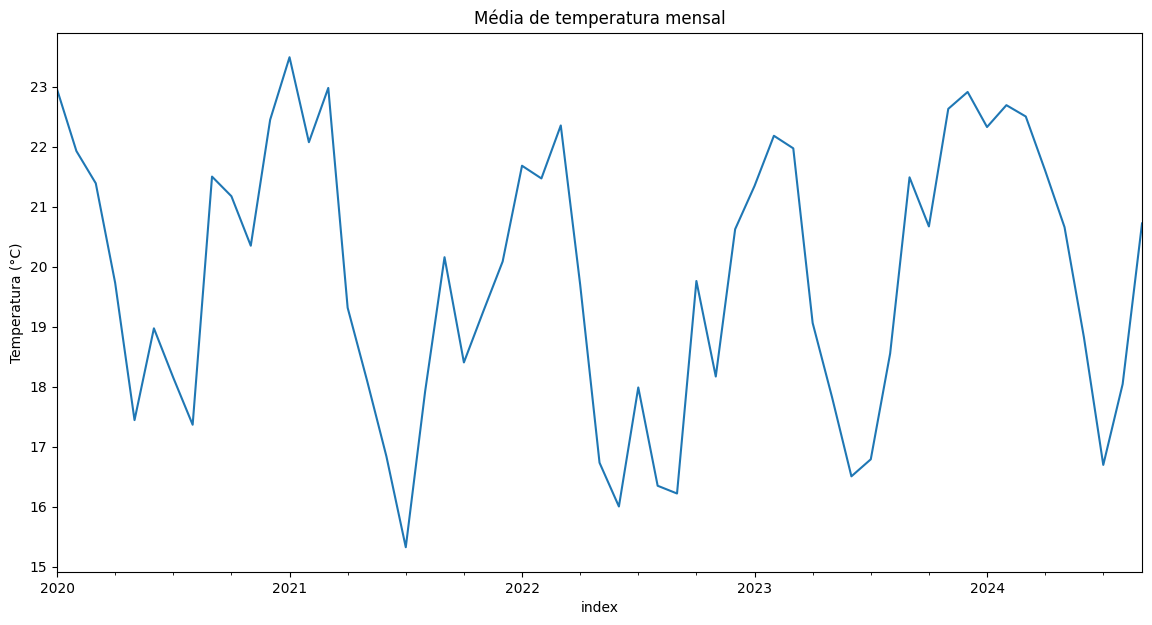

In [16]:
# Análise de temperatura ao longo do tempo
plt.figure(figsize=(14,7))
df2['temp'].resample('M').mean().plot()
plt.title('Média de temperatura mensal')
plt.ylabel('Temperatura (°C)')
plt.show()

C:\Users\prado\AppData\Local\Temp\ipykernel_27308\4127268683.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2['prcp'].resample('M').sum().plot()


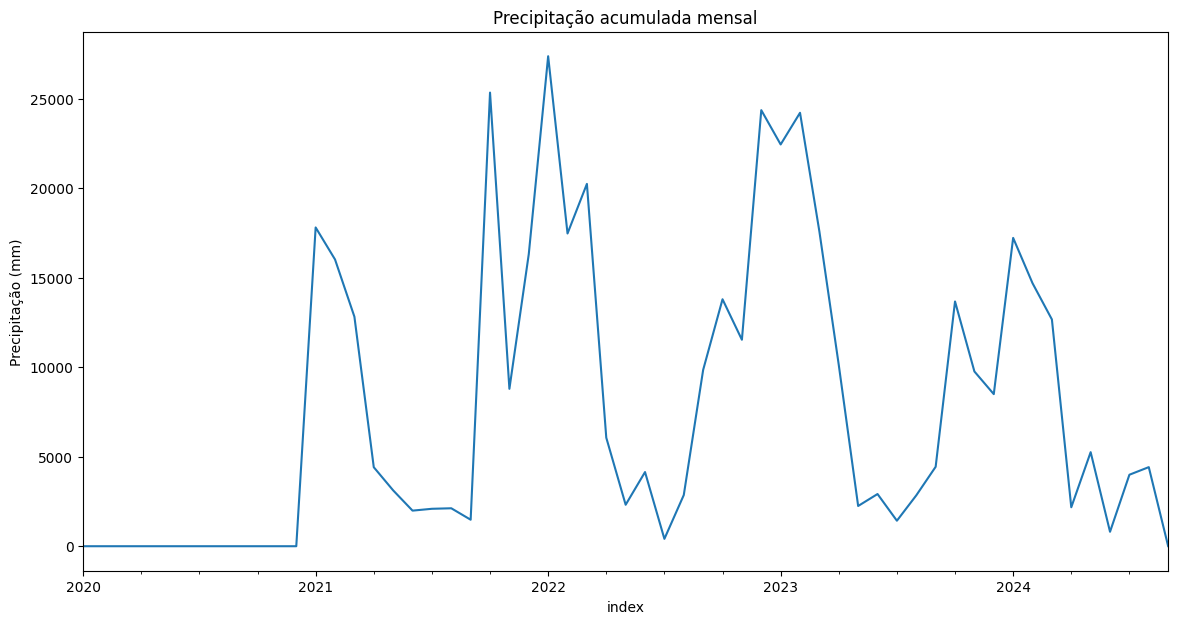

In [17]:
# Análise de precipitação acumulada por mês
plt.figure(figsize=(14,7))
df2['prcp'].resample('M').sum().plot()
plt.title('Precipitação acumulada mensal')
plt.ylabel('Precipitação (mm)')
plt.show()

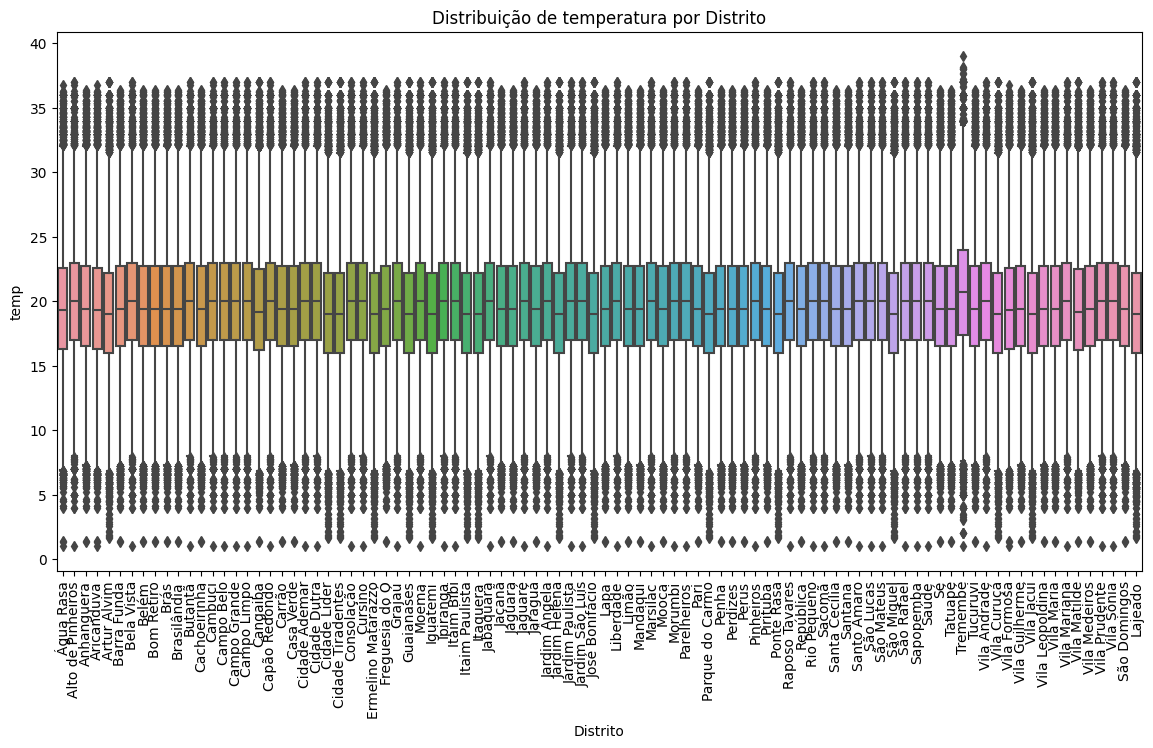

In [18]:
# Comparação de temperatura entre distritos
plt.figure(figsize=(14,7))
sns.boxplot(x='Distrito', y='temp', data=df2)
plt.xticks(rotation=90)
plt.title('Distribuição de temperatura por Distrito')
plt.show()

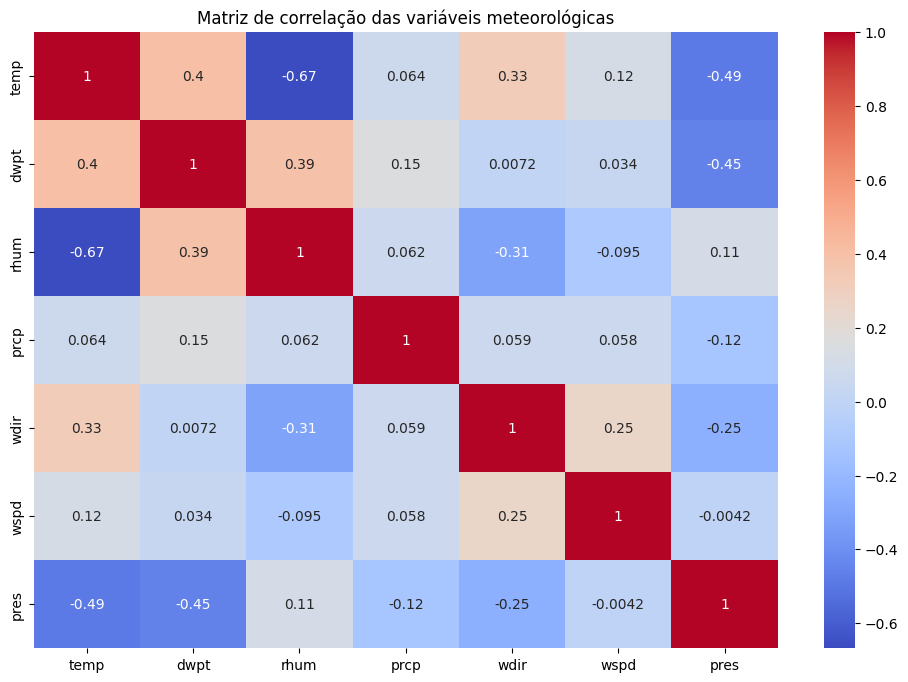

In [19]:
# Correlação entre variáveis meteorológicas
cols_clima = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
corr_matrix = df2[cols_clima].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlação das variáveis meteorológicas')
plt.show()

- Eventos extremos

In [20]:
# Horarios com temperaturas acima de 35°C
calor_ext = df2[df2['temp'] > 35]
print(f"Quantidade de horários com temperaturas extremas (> 35°C): {len(calor_ext)}")

Quantidade de horários com temperaturas extremas (> 35°C): 2309


In [21]:
# Horarios com rajadas de vento fortes (> 50 km/h)
ventos_fortes = df2[df2['wspd'] > 50]
print(f"Quantidade de horarios com fortes ventos (> 50 km/h): {len(ventos_fortes)}")

Quantidade de horarios com fortes ventos (> 50 km/h): 79


In [22]:
# Precipitação (> 50 mm)
chuva_ext = df2[df2['prcp'] > 50]
print(f"Quantidade de dias com precipitação extrema (> 50 mm): {len(chuva_ext)}")

Quantidade de dias com precipitação extrema (> 50 mm): 0


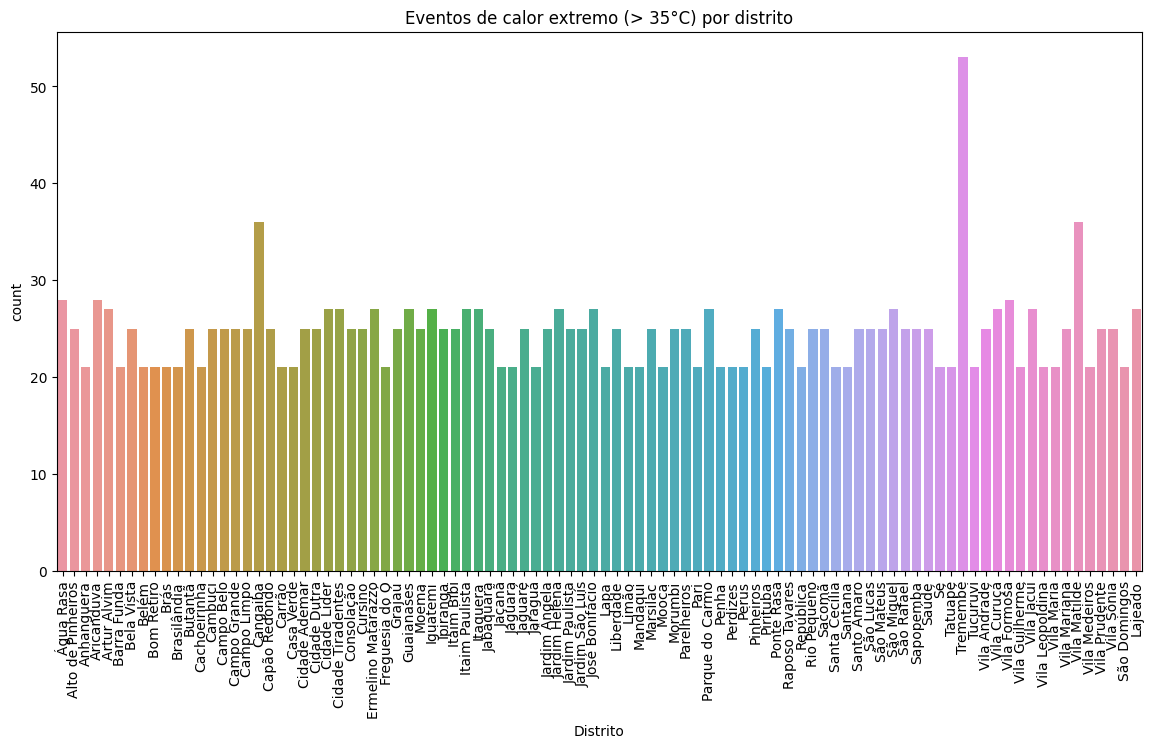

In [23]:
# Analisando eventos extremos por distrito
plt.figure(figsize=(14,7))
sns.countplot(x='Distrito', data=calor_ext)
plt.title('Eventos de calor extremo (> 35°C) por distrito')
plt.xticks(rotation=90)
plt.show()

C:\Users\prado\AppData\Local\Temp\ipykernel_27308\4207882981.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2[['rhum', 'dwpt']].resample('M').mean().plot()


<Figure size 1400x700 with 0 Axes>

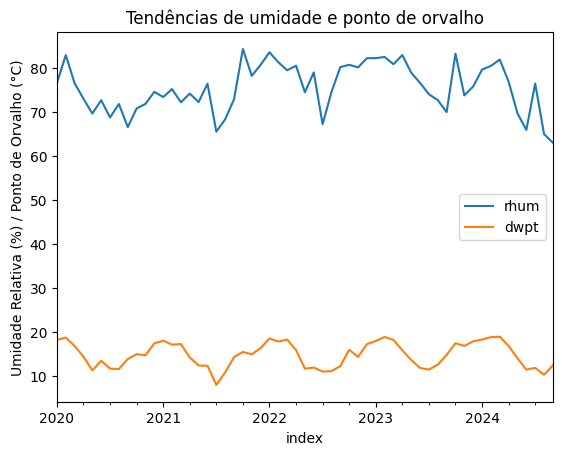

In [24]:
# Tendências de umidade e ponto de orvalho
plt.figure(figsize=(14,7))
df2[['rhum', 'dwpt']].resample('M').mean().plot()
plt.title('Tendências de umidade e ponto de orvalho')
plt.ylabel('Umidade Relativa (%) / Ponto de Orvalho (°C)')
plt.show()

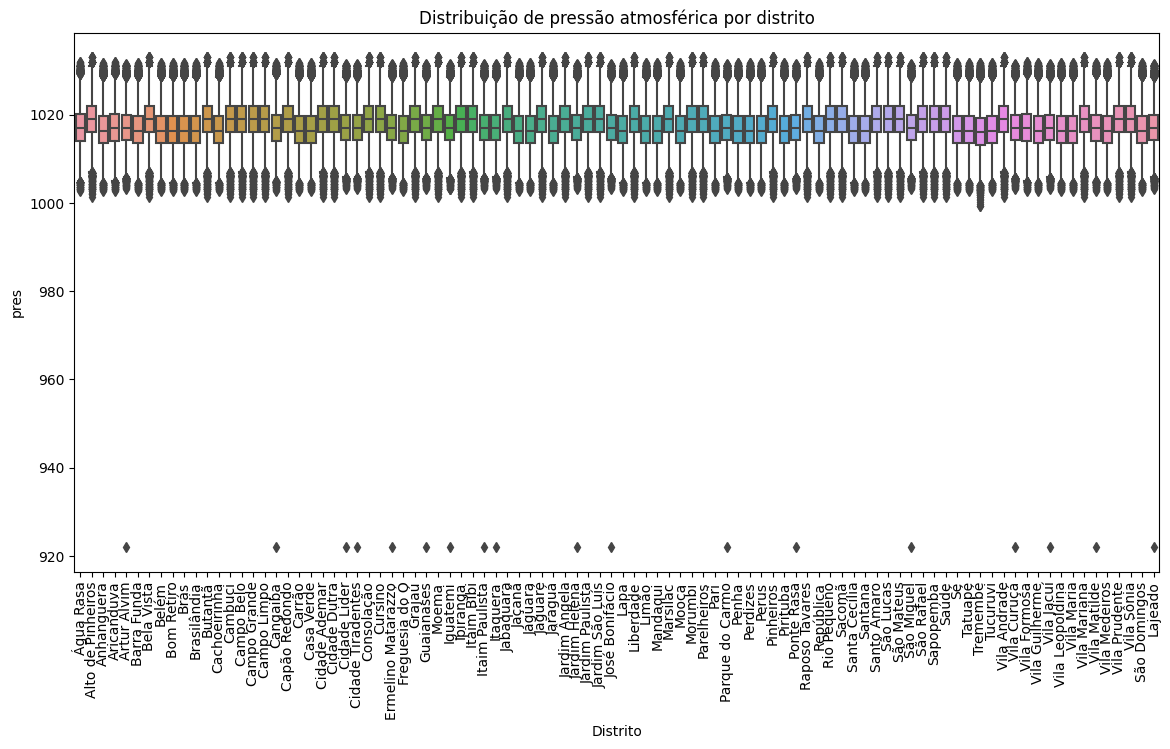

In [25]:
# Análise de variabilidade de pressão atmosférica por localidade
plt.figure(figsize=(14,7))
sns.boxplot(x='Distrito', y='pres', data=df2)
plt.xticks(rotation=90)
plt.title('Distribuição de pressão atmosférica por distrito')
plt.show()

In [26]:
# Comparando sazonabilidade (verão, outono, inverno, primavera)
df2['season'] = df2['month'].apply(lambda x: 'Verão' if x in [12, 1, 2] 
                                             else 'Outono' if x in [3, 4, 5] 
                                             else 'Inverno' if x in [6, 7, 8] 
                                             else 'Primavera')

In [28]:
df2

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,Distrito,year,month,day,hour,season
index,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,23.9,19.6,77.0,NaN,NaN,130.0,3.6,NaN,1013.0,NaN,2.0,Água Rasa,2020,1,1,0,Verão
2020-01-01 01:00:00,24.0,19.1,74.0,NaN,NaN,80.0,7.6,NaN,1014.0,NaN,2.0,Água Rasa,2020,1,1,1,Verão
2020-01-01 02:00:00,24.0,19.1,74.0,NaN,NaN,60.0,9.4,NaN,1014.0,NaN,1.0,Água Rasa,2020,1,1,2,Verão
2020-01-01 03:00:00,24.0,18.0,69.0,NaN,NaN,40.0,5.4,NaN,1013.0,NaN,2.0,Água Rasa,2020,1,1,3,Verão
2020-01-01 04:00:00,24.0,18.0,69.0,NaN,NaN,50.0,5.4,NaN,1013.0,NaN,1.0,Água Rasa,2020,1,1,4,Verão
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-08 20:00:00,29.7,10.3,30.0,0.0,NaN,85.0,17.6,NaN,1018.0,NaN,2.0,Lajeado,2024,9,8,20,Primavera
2024-09-08 21:00:00,26.9,11.8,39.0,0.0,NaN,115.0,14.0,NaN,1018.3,NaN,1.0,Lajeado,2024,9,8,21,Primavera
2024-09-08 22:00:00,25.1,13.0,47.0,0.0,NaN,114.0,12.2,NaN,1018.8,NaN,1.0,Lajeado,2024,9,8,22,Primavera
